In [1]:
import numpy as np
from scipy.linalg import eigh

import matplotlib.pyplot as plt

import functions as fu

## RSRG

### $\lambda = 0$

I study the case when $\lambda = 0$, computing the ground state energy and looking if they follow the expected behaviour of $E_g = -(N-1)$. A discrepacy between the theoretical and computed value can be thought as a measure of error.

In [2]:
# Parameters
N = 2
l = 0
threshold = 1e-3
max_iter = 15
d_eff = 2**N


normgs_eigval_dict, eigvec, deltas_dim, actual_dim = fu.real_space_rg(N, l, threshold, d_eff, max_iter)

gs_eigval = {N: N * en for N, en in normgs_eigval_dict.items()}

theoretical_eigval = {N: -(N-1) for N in normgs_eigval_dict.keys()}

error_eigval = {N: np.abs((gs_eigval[N] - theoretical_eigval[N])/theoretical_eigval[N]) for N in normgs_eigval_dict.keys()}


Convergence achieved at iteration 9: ε = -1.0060746215688376 

Converged reached for a system with N = 1024 sites, with precision: delta = 0.000987153154070386


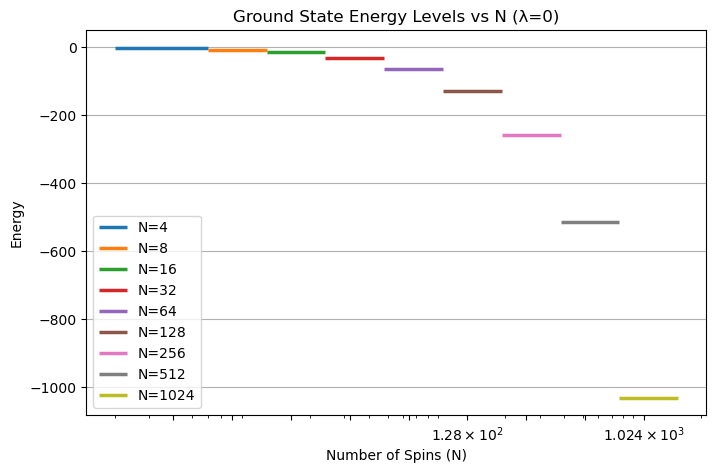

In [3]:
plt.figure(figsize=(8, 5))

fu.plot_dict_N_GSen(gs_eigval, "hlines")

plt.xscale('log')
plt.xticks(list(gs_eigval.keys()))   # Set x-axis ticks to be exactly the N values
# plt.yticks(list(eigenvalues.values()))
plt.xlabel('Number of Spins (N)')
plt.ylabel('Energy')
plt.title(f'Ground State Energy Levels vs N (λ=0)')
plt.legend(loc='lower left')
plt.grid(axis='y')
plt.show()

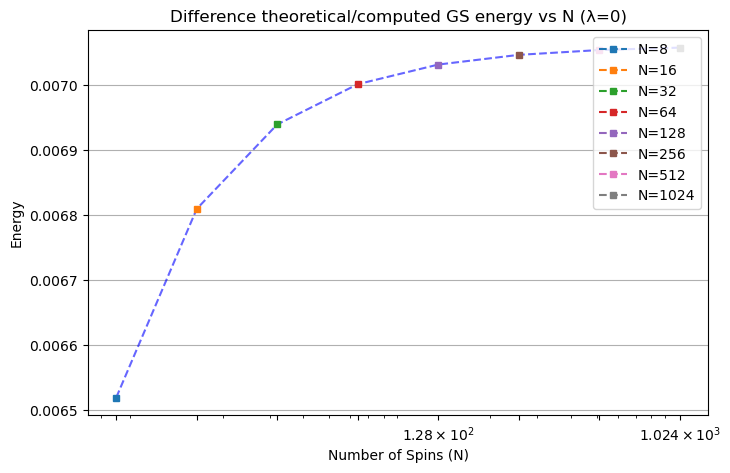

In [4]:
plt.figure(figsize=(8, 5))
plt.plot(list(error_eigval.keys())[1:],list(error_eigval.values())[1:], "--", color = "blue", alpha = 0.6)

fu.plot_dict_N_GSen(error_eigval, "plot")

plt.xscale('log')
plt.xticks(list(error_eigval.keys())[1:])   # Set x-axis ticks to be exactly the N values
# plt.yticks(list(eigenvalues.values()))
plt.xlabel('Number of Spins (N)')
plt.ylabel('Energy')
plt.title(f'Difference theoretical/computed GS energy vs N (λ=0)')
plt.legend(loc='upper right')
plt.grid(axis='y')
plt.show()

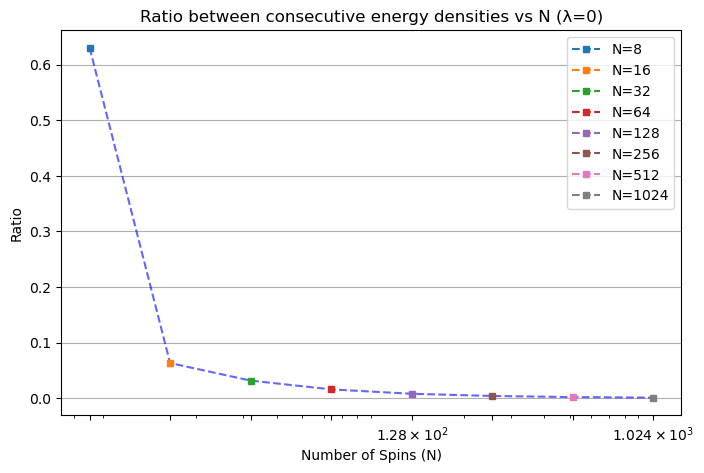

In [5]:
plt.figure(figsize=(8, 5))
plt.plot(list(deltas_dim.keys())[1:],list(deltas_dim.values())[1:], "--", color = "blue", alpha = 0.6)

fu.plot_dict_N_GSen(deltas_dim, "plot")

plt.xscale('log')
plt.xticks(list(deltas_dim.keys())[1:])   # Set x-axis ticks to be exactly the N values
# plt.yticks(list(eigenvalues.values()))
plt.xlabel('Number of Spins (N)')
plt.ylabel('Ratio')
plt.title(f'Ratio between consecutive energy densities vs N (λ=0)')
plt.legend(loc='upper right')
plt.grid(axis='y')
plt.show()

In these graphs we have compared the computed values of the ground state energies provided by the algorithm with the theoretical expectation value with lambda = 0. The error decreases as the number of spins increases, and it's below 1%

### $\lambda = \infty$

We can perform the same reasoning comparing the results provided by the RSRG with the theoretical ground state energy in this regime, namely $E_g = - \lambda \cdot N$.

In [6]:
import numpy as np
from scipy.linalg import eigh

import matplotlib.pyplot as plt

import functions as fu

# Parameters
N = 2
l = 1e5
threshold = 1e-10
max_iter = 15
d_eff = 2**N


normgs_eigval_dict, eigvec, deltas_dim, actual_dim = fu.real_space_rg(N, l, threshold, d_eff, max_iter)

gs_eigval = {N: N * en for N, en in normgs_eigval_dict.items()}

theoretical_eigval = {N: -(l*N) for N in normgs_eigval_dict.keys()}

error_eigval = {N: np.abs((gs_eigval[N] - theoretical_eigval[N])/theoretical_eigval[N]) for N in normgs_eigval_dict.keys()}


Convergence achieved at iteration 7: ε = -100000.00000211906 

Converged reached for a system with N = 256 sites, with precision: delta = 8.731149137020111e-11


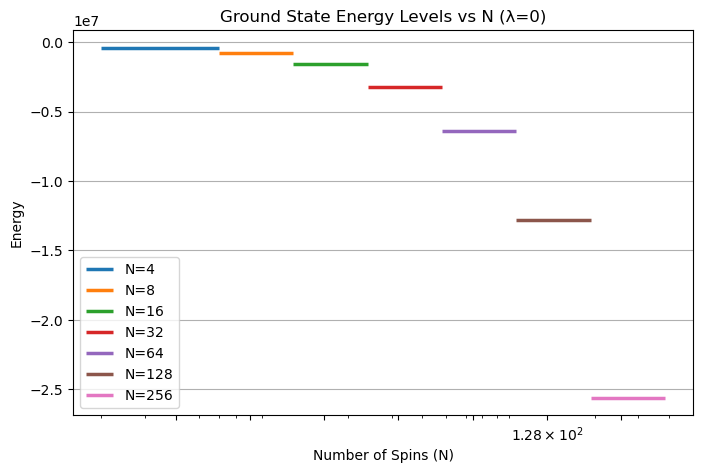

In [7]:
plt.figure(figsize=(8, 5))

fu.plot_dict_N_GSen(gs_eigval, "hlines")

plt.xscale('log')
plt.xticks(list(gs_eigval.keys()))   # Set x-axis ticks to be exactly the N values
# plt.yticks(list(eigenvalues.values()))
plt.xlabel('Number of Spins (N)')
plt.ylabel('Energy')
plt.title(f'Ground State Energy Levels vs N (λ=0)')
plt.legend(loc='lower left')
plt.grid(axis='y')
plt.show()

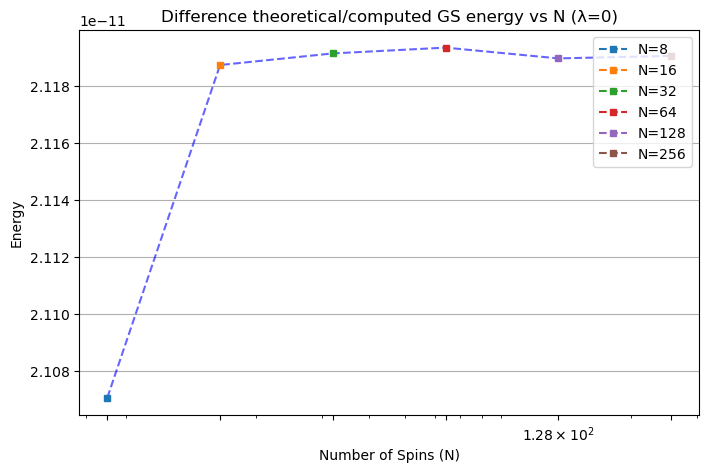

In [8]:
plt.figure(figsize=(8, 5))
plt.plot(list(error_eigval.keys())[1:],list(error_eigval.values())[1:], "--", color = "blue", alpha = 0.6)

fu.plot_dict_N_GSen(error_eigval, "plot")

plt.xscale('log')
plt.xticks(list(error_eigval.keys())[1:])   # Set x-axis ticks to be exactly the N values
# plt.yticks(list(eigenvalues.values()))
plt.xlabel('Number of Spins (N)')
plt.ylabel('Energy')
plt.title(f'Difference theoretical/computed GS energy vs N (λ=0)')
plt.legend(loc='upper right')
plt.grid(axis='y')
plt.show()

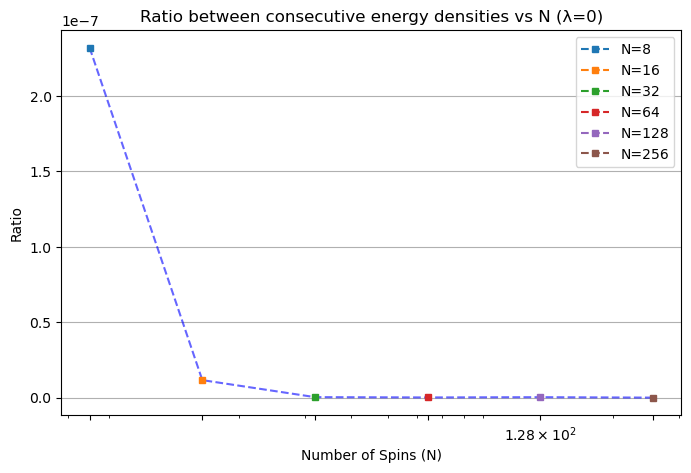

In [9]:
plt.figure(figsize=(8, 5))
plt.plot(list(deltas_dim.keys())[1:],list(deltas_dim.values())[1:], "--", color = "blue", alpha = 0.6)

fu.plot_dict_N_GSen(deltas_dim, "plot")

plt.xscale('log')
plt.xticks(list(deltas_dim.keys())[1:])   # Set x-axis ticks to be exactly the N values
# plt.yticks(list(eigenvalues.values()))
plt.xlabel('Number of Spins (N)')
plt.ylabel('Ratio')
plt.title(f'Ratio between consecutive energy densities vs N (λ=0)')
plt.legend(loc='upper right')
plt.grid(axis='y')
plt.show()

to do 
- comparare RMRG con exact diagonalization (posso farlo solo per N = 4 e N = 8 perchè dopo non può più allocare), al variare di lambda.
così finisco di vedere se l'algoritmo RSRG funziona
- dopo devo confrontarlo con il mean field --> capire cosa è il mean field.

- passare all'implementazione di infinte DMRG.

In [10]:
import numpy as np
from scipy.linalg import eigh

import matplotlib.pyplot as plt

import functions as fu
import meanfield as mf

# Parameters
N = 2
# l_values = np.linspace(0, -3, 20)
l_values = np.logspace(2, -2, 20)
threshold = 1e-3
max_iter = 2
actual_dim = N*(2**max_iter)

eigval_dict = fu.update_hamiltonian(N, l_values, threshold, max_iter)

dict_4 = {key: subdict[4] for key, subdict in eigval_dict.items()}
dict_8 = {key: subdict[8] for key, subdict in eigval_dict.items()}


exact_gs_energy, exact_gs = mf.diagonalize_ising(actual_dim, l_values, k=1)

dict_4_exact = {key[1]: value for key, value in exact_gs_energy.items() if key[0] == 4}
dict_8_exact = {key[1]: value for key, value in exact_gs_energy.items() if key[0] == 8}




Convergence achieved at iteration 2: ε = -100.00210824061661 

Converged reached for a system with N = 8 sites, with precision: delta = 0.00023323671044295224
Convergence achieved at iteration 2: ε = -61.5882455805913 

Converged reached for a system with N = 8 sites, with precision: delta = 0.00037987587992915905
Convergence achieved at iteration 2: ε = -37.932465557610506 

Converged reached for a system with N = 8 sites, with precision: delta = 0.0006198582644643125
Convergence achieved at iteration 2: ε = -23.366256935093432 

Converged reached for a system with N = 8 sites, with precision: delta = 0.0010144395384834581
Convergence achieved at iteration 2: ε = -14.3992030036637 

Converged reached for a system with N = 8 sites, with precision: delta = 0.0016679450244030392
Convergence achieved at iteration 2: ε = -8.882601576020214 

Converged reached for a system with N = 8 sites, with precision: delta = 0.002762360671672681
Convergence achieved at iteration 2: ε = -5.494613041094

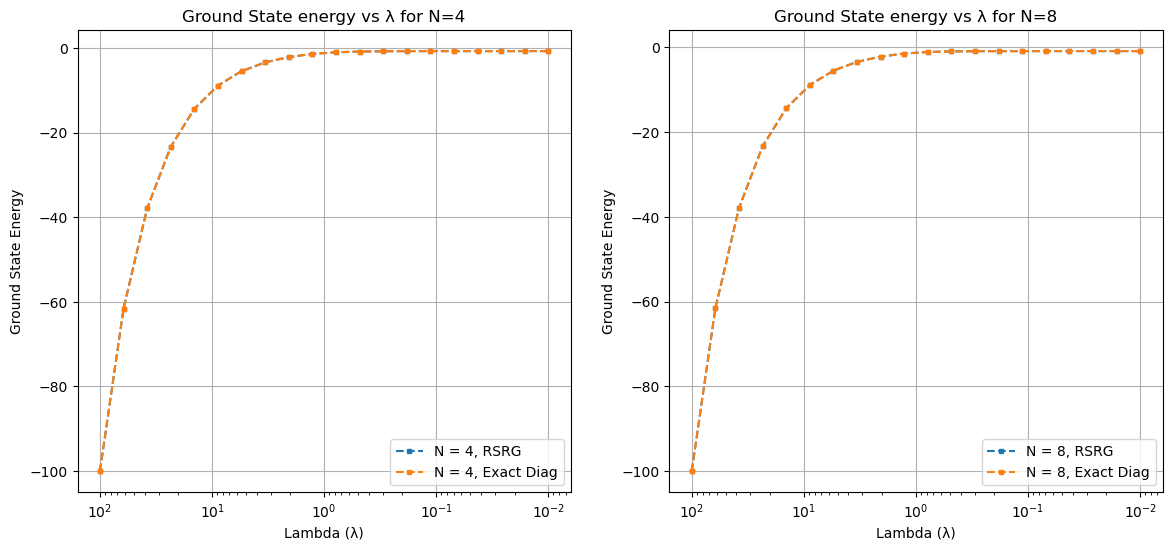

In [11]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

ax1.plot(dict_4.keys(), dict_4.values(), "s--", markersize = 3, label=f'N = 4, RSRG')
ax1.plot(dict_4_exact.keys(), dict_4_exact.values(), "s--", markersize = 3, label=f'N = 4, Exact Diag')

# plt.xlim(0.1,3)
# plt.ylim(-3, 0)
ax1.invert_xaxis()
# plt.gca().invert_yaxis()
ax1.set_xscale('log')  # Scala logaritmica sull'asse x
ax1.set_xlabel('Lambda (λ)')
ax1.set_ylabel('Ground State Energy')
ax1.set_title('Ground State energy vs λ for N=4')
ax1.legend()
ax1.grid(True)

ax2.plot(dict_8.keys(), dict_8.values(), "s--", markersize = 3, label=f'N = 8, RSRG')
ax2.plot(dict_8_exact.keys(), dict_8_exact.values(), "s--", markersize = 3, label=f'N = 8, Exact Diag')

# plt.xlim(0.1,3)
# plt.ylim(-3, 0)
ax2.invert_xaxis()
# plt.gca().invert_yaxis()
ax2.set_xscale('log')  # Scala logaritmica sull'asse x
ax2.set_xlabel('Lambda (λ)')
ax2.set_ylabel('Ground State Energy')
ax2.set_title('Ground State energy vs λ for N=8')
ax2.legend()
ax2.grid(True)

plt.show()


## Comparison: RSRG - meanfield

In [12]:
import numpy as np
from scipy.linalg import eigh

import matplotlib.pyplot as plt

import functions as fu
import scipy.sparse as sp

# Parameters
N = 4
l = 0.1
threshold = 0
max_iter = 15
d_eff = 2**N


normgs_eigval_dict, last_eigvec, deltas_dim, actual_dim = fu.real_space_rg(N, l, threshold, d_eff, max_iter)

print(len(last_eigvec))
def Mag(N):
  _, _, s_z = fu.pauli_matrices()  # Retrieve sparse Pauli matrices
  
  M_z = sp.csr_matrix((2**N, 2**N), dtype=complex)
  
  for i in range(N):
    M_z_i = sp.kron(sp.identity(2**i, format='csr'), sp.kron(s_z, sp.identity(2**(N - i - 1), format='csr')))
    M_z += M_z_i
    
  M_z /= N
  return M_z

M_z = Mag(8)
# magnetization = (last_eigvec.conj().T @ (M_z @ last_eigvec)).real
magnetization = (last_eigvec.conj().transpose().dot(M_z.dot(last_eigvec))).real
print(M_z.shape)
print(magnetization)

Convergence achieved at iteration 15: ε = -1.0022666607197437 

Converged reached for a system with N = 131072 sites, with precision: delta = 7.553099762303006e-06
256
(256, 256)
0.9999999955118889


In [13]:
print(actual_dim)

131072
